In [62]:
# prompt: install pandas and numpy , write a basic code with those

# !pip install pandas numpy

import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report





# Create a sample DataFrame
data = {'col1': [1, 2, 3, 4, 5], 'col2': [6, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

# Calculate the mean of 'col1'
mean_col1 = np.mean(df['col1'])
print(f"\nMean of col1: {mean_col1}")


   col1  col2
0     1     6
1     2     7
2     3     8
3     4     9
4     5    10

Mean of col1: 3.0


In [2]:
df = pd.read_csv('cyberbullying_tweets.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [5]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7998
age,7992
gender,7973
ethnicity,7961
not_cyberbullying,7945
other_cyberbullying,7823


In [6]:
df = df.rename(columns={
    'tweet_text': 'text', 'cyberbullying_type': 'sentiment'
    })
df.head()

,text,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [7]:
df['sendtiment_encoded'] = df['sentiment'].replace({
    'religion':1,
    'age':2,
    'ethnicity':3,
    'gender':4,
    'not_cyberbullying':5,
    'other_cyberbullying':6
})
df.head(10)

<ipython-input-7-84c915cbc694>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sendtiment_encoded'] = df['sentiment'].replace({


,text,sentiment,sendtiment_encoded
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,5
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,5
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,5
8,@stockputout everything but mostly my priest,not_cyberbullying,5
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,5


In [8]:
import nltk
# import emoji
import string
import re
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [10]:
### preprocessing of text
!pip install emoji
import emoji
stop_words = set(stopwords.words('english'))
print(emoji.emojize('Python is :thumbs_up:'))
def strip_emoji(text):
    return emoji.replace_emoji(text, replace='')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.7 MB/s eta 0:00:00
Python is 👍


In [11]:
#function to convert text to lowercase, remove (unwanted characters, url, non-utf stuff, numbers, stopwords)
def strip_all_entities(text):
  text = text.replace('\r', '').replace('\n', '').lower()
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r'[^\x00-\x7f]',r'', text)
  text = re.sub('[0-9]+', '', text)
  # text = re.sub(r'[^\w\s]','',text)

  stopchars = string.punctuation
  table = str.maketrans('', '', stopchars)
  text = text.translate(table)

  text=[word for word in text.split() if word not in stop_words]
  text = ' '.join(text)

  return text

In [12]:
#function to remove contractions

def decontract(text):
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\t", " not", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)
  return text

In [13]:
# function to clean hashtags

def clean_hashtags(tweet):
  new_tweet=" ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
  new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
  return new_tweet2

In [14]:
#function to filter special characters
def filter_chars(a):
  sent = []
  for word in a.split(' '):
    if('$' in word) | ('&' in word):
      sent.append(i)
    else:
      sent.append(word)
  return ' '.join(sent)

In [15]:
# removing sequences and applying stemming
def remove_mult_spaces(text):
  return re.sub("\s\s+", " ", text)

def stemmer(text):
  tokenized = nltk.word_tokenize(text)
  ps = PorterStemmer()
  return ' '.join([ps.stem(words) for words in tokenized])

def lemmatize(text):
  tokenized = nltk.word_tokenize(text)
  lm = WordNetLemmatizer()
  return ' '.join([lm.lemmatize(words) for words in tokenized])

In [16]:
#using all functions

def preprocess(text):
  text = strip_emoji(text)
  text = decontract(text)
  text = strip_all_entities(text)
  text = clean_hashtags(text)
  text = filter_chars(text)
  text = remove_mult_spaces(text)
  text = stemmer(text)
  text = lemmatize(text)
  return text

In [17]:
nltk.download('punkt_tab')
nltk.download('wordnet')
df['cleaned_text'] = df['text'].apply(preprocess)
df.head(10)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,sentiment,sendtiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5,isi account pretend kurdish account like islam...
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,5,ye test god good bad indiffer weird whatev pro...
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,5,itu sekolah ya bukan tempat bulli ga jauh kaya...
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,5,karma hope bite kat butt nasti mkr
8,@stockputout everything but mostly my priest,not_cyberbullying,5,everyth mostli priest
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,5,rebecca black drop school due bulli


In [18]:
#dealing with duplicates
df['cleaned_text'].duplicated().sum()

np.int64(3041)

In [19]:
df.drop_duplicates('cleaned_text', inplace=True)
df['cleaned_text'].duplicated().sum()

np.int64(0)

In [20]:
#tokenization

df['tweet_list'] = df['cleaned_text'].apply(word_tokenize)
df.head()

,text,sentiment,sendtiment_encoded,cleaned_text,tweet_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like..."


In [21]:
text_len = []
for text in df['cleaned_text']:
  tweet_len = len(word_tokenize(text))
  text_len.append(tweet_len)

df['tweet_len'] = text_len
df.head()

,text,sentiment,sendtiment_encoded,cleaned_text,tweet_list,tweet_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...",11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d...",9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like...",8


<ipython-input-22-70e3e303c10c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tweet_len'])


<Axes: xlabel='tweet_len', ylabel='Density'>

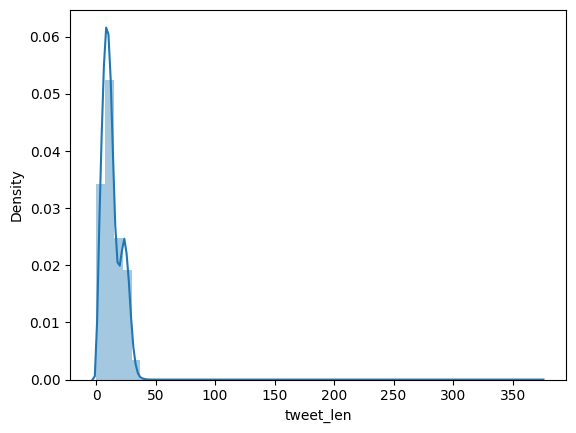

In [22]:
import seaborn as sns
sns.distplot(df['tweet_len'])

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

<ipython-input-24-b63bd50ea610>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='tweet_len', data=df, palette='mako')


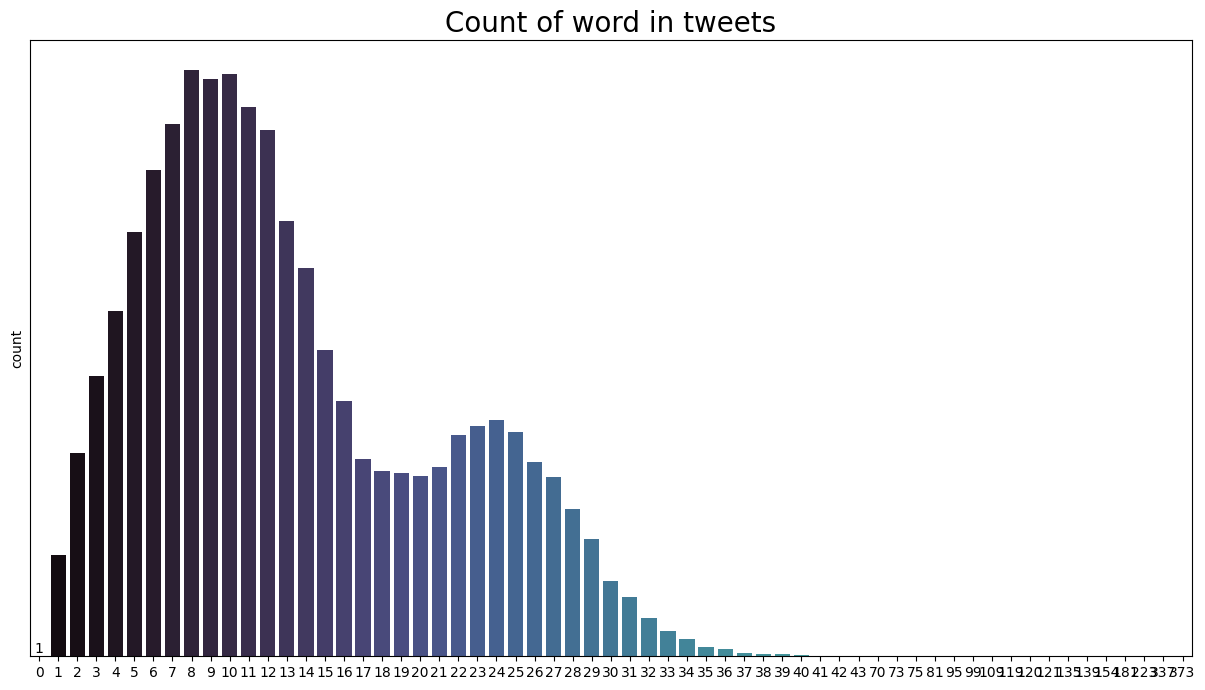

In [24]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='tweet_len', data=df, palette='mako')
plt.title('Count of word in tweets', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [25]:
df.shape

(44651, 6)

In [26]:
#function to create a word cloud

def plot_wordcloud(cyberbullying_type):
  string = ""
  for i in df[df.sentiment == cyberbullying_type].cleaned_text.values:
    string = string + " " + i.strip()

  wordcloud = WordCloud(background_color = 'white',max_words=2000, max_font_size=256,
    random_state=42).generate(string)

  #plot the wordcloud image
  plt.figure(figsize=(8,8), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.title(cyberbullying_type)
  plt.show()
  del string

In [27]:
#splitting data based on sentiment for EDA

not_cyberbullying_type = df[df['sentiment'] == 'not_cyberbullying']
religion_type = df[df['sentiment'] == 'religion']
age_type = df[df['sentiment'] == 'age']
ethnicity_type = df[df['sentiment'] == 'ethnicity']
gender_type = df[df['sentiment'] == 'gender']
other_cyberbullying_type = df[df['sentiment'] == 'other_cyberbullying']

In [28]:
gender = Counter([item for sublist in gender_type.tweet_list.values for item in sublist])
top20_gender = pd.DataFrame(gender.most_common(20))
top20_gender.columns = ['Top Words', 'Count']
top20_gender.head(20)

,Top Words,Count
0,joke,5179
1,rape,4070
2,gay,3852
3,call,1401
4,make,1284
5,rt,1219
6,woman,1182
7,bitch,1145
8,femal,1108
9,peopl,988


Text(0.5, 1.0, 'Top 20 Words in Gender Sentiment')

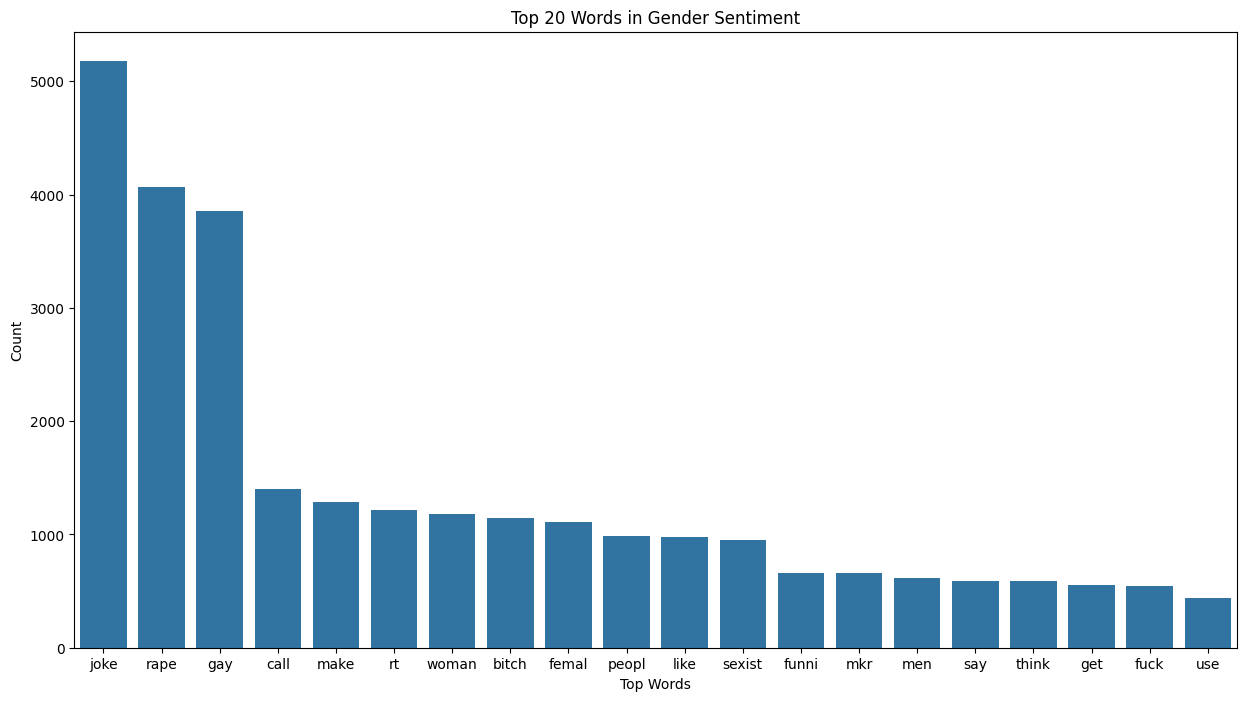

In [29]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_gender, y="Count", x="Top Words")
plt.title("Top 20 Words in Gender Sentiment")

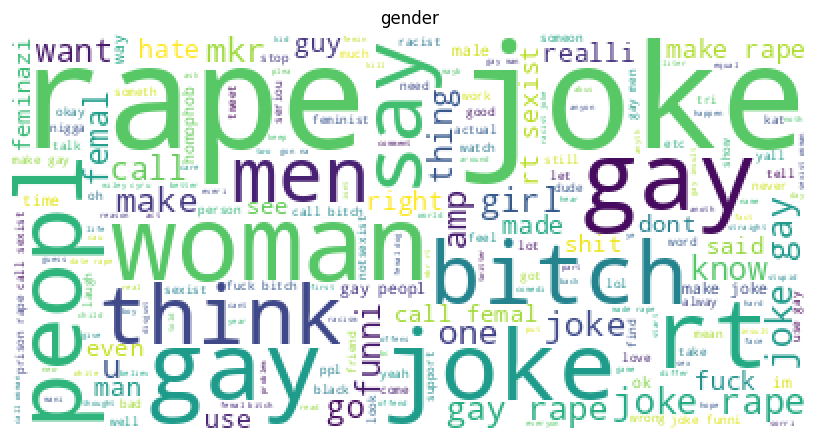

In [30]:
plot_wordcloud('gender')

In [31]:
from collections import Counter
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
top20_religion = pd.DataFrame(religion.most_common(20))
top20_religion.columns = ['Top Words', 'Count']
top20_religion.style.background_gradient(cmap='Greens')

,Top Words,Count
0,muslim,4618
1,idiot,3075
2,islam,2440
3,christian,2132
4,u,1922
5,terrorist,1379
6,right,1290
7,like,1276
8,support,1250
9,woman,1247


Text(0.5, 1.0, 'Top 20 Words in Religion Sentiment')

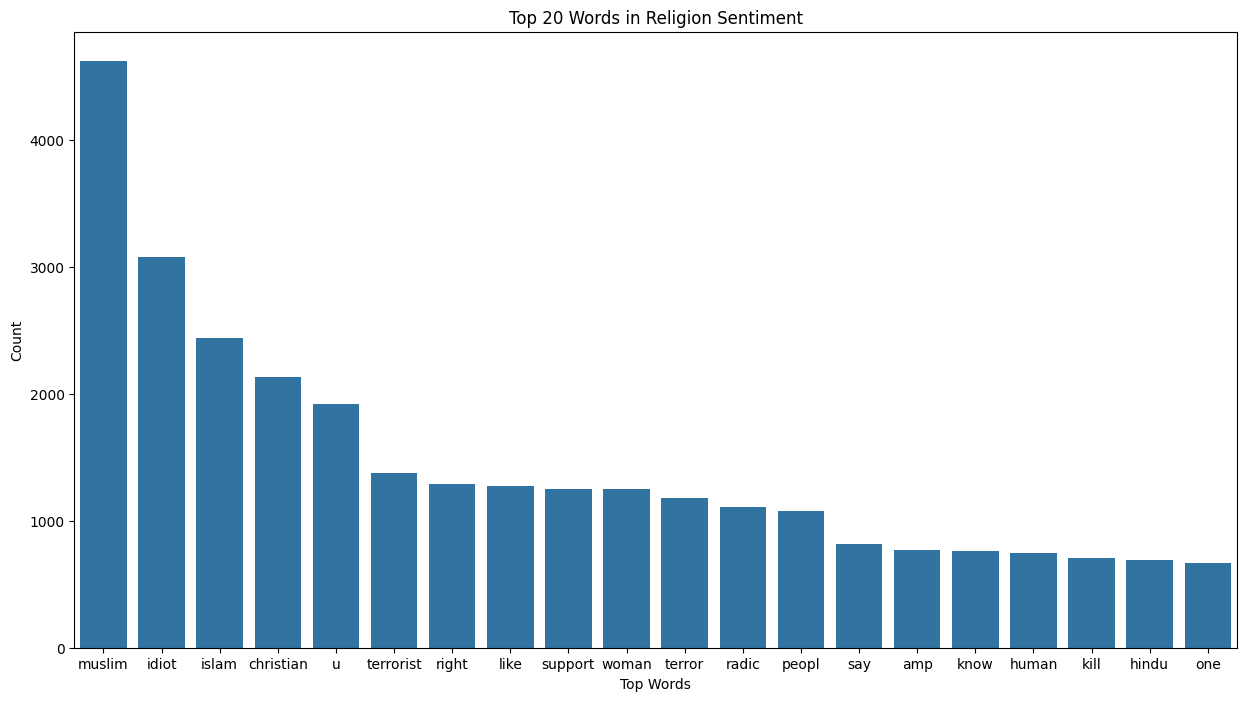

In [32]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_religion, y="Count", x="Top Words")
plt.title("Top 20 Words in Religion Sentiment")

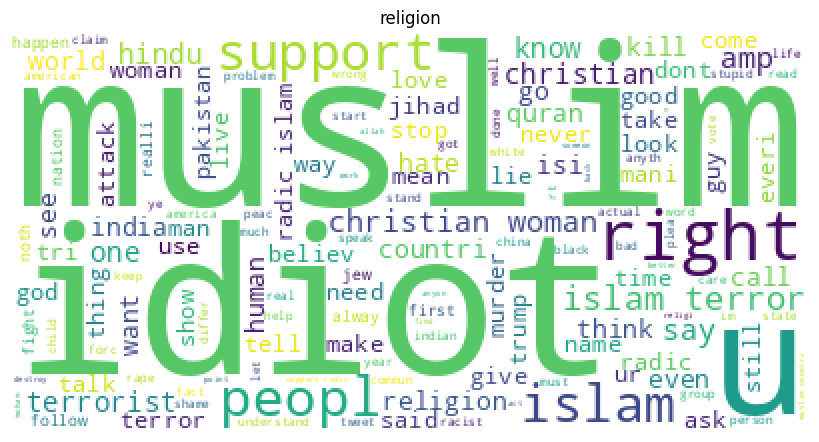

In [33]:
plot_wordcloud('religion')

In [34]:
#output for age cyber bullying
# Do same like religion for rest sentiments
# fig = plt.figure(figsize=(15,8))
# sns.barplot(data=top20_age, y="Count", x="Top Words")
# plt.title("Top 20 Words in Religion Sentiment")

In [35]:
df.head()

,text,sentiment,sendtiment_encoded,cleaned_text,tweet_list,tweet_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...",11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d...",9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like...",8


In [36]:
sentiments = ["religion", "age", "ethnicity", "gender", "not_cyberbullying", "other_cyberbulling"]

In [37]:
#Modelling   ## splitting data in test and train

In [38]:
X,Y = df['cleaned_text'], df['sentiment']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(31255,) (31255,) (13396,) (13396,)


In [40]:
#tf - idf vectorization
# !pip install TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
import pickle

tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(31255, 29251)
(13396, 29251)


In [41]:
#Logistic regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
log_reg = LogisticRegression()

log_cv_score = cross_val_score(log_reg, X_train_tf, y_train, cv = 5, scoring = 'f1_macro', n_jobs = -1)
mean_log_cv = np.mean(log_cv_score)
mean_log_cv

np.float64(0.8217571042907901)

In [42]:
#Linear support Vector (same o/p as logistic regression)
# lin_svc = LinearSVC()

# lin_svc_cv_score = cross_val_score(lin_svc, X_train_tf, y_train, cv = 5, scoring = 'f1_macro', n_jobs = -1)
# mean_lin_svc_cv = np.mean(lin_svc_cv_score)
# mean_lin_svc_cv

In [43]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB()
multiNB_cv_score = cross_val_score(multiNB, X_train_tf, y_train, cv = 5, scoring = 'f1_macro', n_jobs = -1)
mean_multiNB_cv = np.mean(multiNB_cv_score)
mean_multiNB_cv

np.float64(0.6694520007269706)

In [44]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt, X_train_tf, y_train, cv = 5, scoring = 'f1_macro', n_jobs = -1)
mean_dt_cv = np.mean(dt_cv_score)
mean_dt_cv

np.float64(0.8098112175506481)

In [45]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_cv_score = cross_val_score(rf, X_train_tf, y_train, cv = 5, scoring = 'f1_macro', n_jobs = -1)
mean_rf_cv = np.mean(rf_cv_score)
mean_rf_cv

np.float64(0.8310424806182037)

In [46]:
# also try ada boost classifier, if u want to
# by trying diff models,we could see logistic have good results and then svm and then random forest classifier

In [49]:
svc1=LinearSVC()
param_grid={'C':[0.0001,0.001,0.01,0.1,1,10],
            'loss':['hinge','squared_hinge'],
            'fit_intercept':[True,False]}
grid_search=GridSearchCV(svc1,param_grid,cv=5,scoring='f1_macro',n_jobs=-1,verbose=0,return_train_score=True)
grid_search.fit(X_train_tf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge']},
             return_train_score=True, scoring='f1_macro')

In [50]:
grid_search.best_estimator_

LinearSVC(C=1, loss='hinge')

In [51]:
grid_search.best_score_

np.float64(0.8233490670016768)

In [54]:
#support vector
lin_svc=LinearSVC()
lin_svc_cv_score=cross_val_score(lin_svc,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_lin_svc_cv=np.mean(lin_svc_cv_score)
mean_lin_svc_cv


np.float64(0.8202104967451355)

In [55]:
#evalution
lin_svc.fit(X_train_tf,y_train)
y_pred=lin_svc.predict(X_test_tf)

In [57]:
def print_confusion_matrix(confusion_matrix,class_names,figsize=(10,7),fontsize=14):
  df_cm=pd.DataFrame(confusion_matrix,index=class_names,columns=class_names)
  fig=plt.figure(figsize=figsize)
  try:
    heatmap=sns.heatmap(df_cm,annot=True,fmt='d')
  except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right',fontsize=fontsize)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


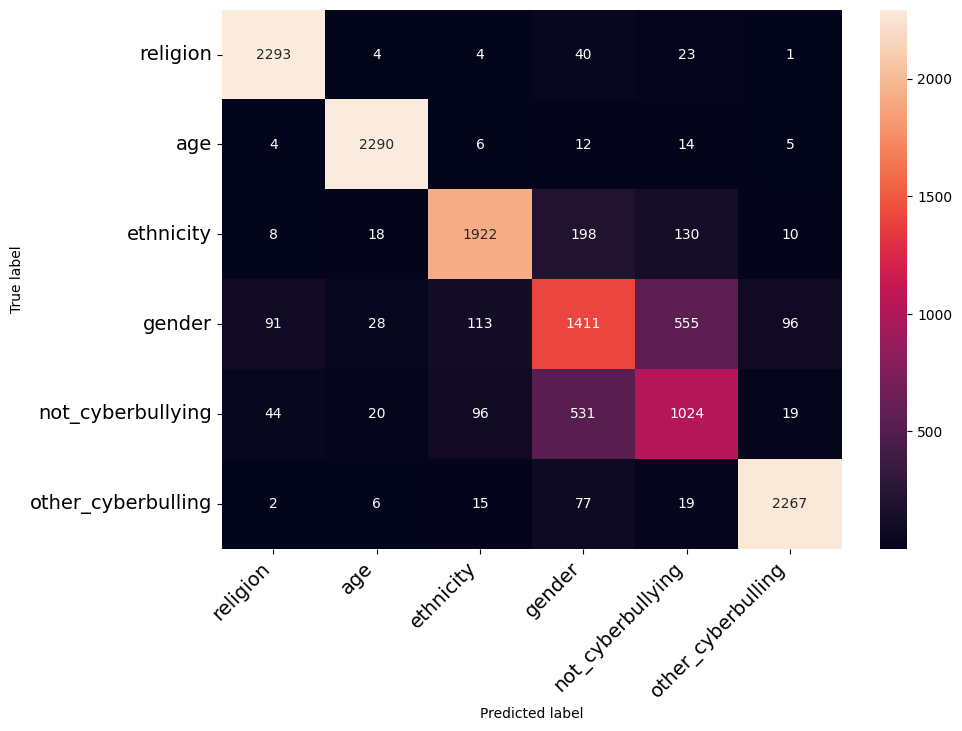

In [59]:
cm=confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,sentiments)

In [63]:
print('Classification Report:\n',classification_report(y_test,y_pred,target_names=sentiments))

Classification Report:
                     precision    recall  f1-score   support

          religion       0.94      0.97      0.95      2365
               age       0.97      0.98      0.98      2331
         ethnicity       0.89      0.84      0.87      2286
            gender       0.62      0.62      0.62      2294
 not_cyberbullying       0.58      0.59      0.59      1734
other_cyberbulling       0.95      0.95      0.95      2386

          accuracy                           0.84     13396
         macro avg       0.82      0.82      0.82     13396
      weighted avg       0.84      0.84      0.84     13396

